In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite
/kaggle/input/glove-6b-100-d/glove.6B.100d.txt


In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv(r"/kaggle/input/amazon-fine-food-reviews/Reviews.csv")

In [4]:
pd.set_option('display.max_colwidth', None)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
dataset.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [7]:
print(dataset[['Score','Text']].head(5))

   Score  \
0      5   
1      1   
2      4   
3      2   
4      5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Text  
0                                                                                                                                                                                                                                                        I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed m

In [8]:
print(dataset.isna().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [9]:
lmtpData=dataset[['Text','Summary','Score']].sample(n=1000)
print(lmtpData)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Text  \
441316                                                   

### ADDING SENTIMENT COLUMN

In [10]:
#0-negative, 1-positive
def lblScore(score):
    if score<=2:
        return 0
    elif score>=4:
        return 1
    else:
        return 2
lmtpData['Sentiment']=lmtpData['Score'].apply(lblScore)
lmtpData.head(5)

,Text,Summary,Score,Sentiment
441316,"This is definitely a dessert coffee. It has a very mild blend of beans and the buttercream flavor lends its flavor to a very mellow brew. Enjoyable and very palatable, but best enjoyed as a follow up to a meal or as a dessert accompaniment.",Good full flavored cup of dessert coffee,4,1
185215,"I have always loved Swiss Colony for all of their Petits Fours and Bonbons. They are so delicious and mouth watering, you will absolutely love them! I know they are a little expensive, but well worth it. I would highly recommend Swiss Colony!",Mouth Watering Delicious!,5,1
197013,These bars are great! They are wholesome and excellent for an on the go snack!,nature valley's Chewy Trail Mix bars are yummy!,5,1
509580,"Amazon offers this tea at an amazing price compared to our local grocery stores...even when our stores have it on sale. And with Free Shipping, you can't beat it.",Best Tea Around,5,1
402934,"I have a nearly 1 year old golden retriever/standard poodle mix, and a 6 year old german shepherd. The doodle gets the chicken and brown rice (just switched her a few weeks ago from Nutro Max) and the shepherd gets the healthy weight. I have tried several different foods for the doodle, and many of them caused problems like diarrhea and stinky, stinky farts. With this, while switching from the Nutro Max, she had none of those problems. In fact, I only took 5 days to switch her instead of 2 or so weeks, and she didn't have any digestive problems. Both dogs seem to like it and it is definitely cost effective... several dollars cheaper at my local Wegman's and there are always coupons in the paper. This is a very high quality food for the price, and I like that it's available at the grocery store as I live in a small town. I highly recommend this food and hope to feed it exclusively for as long as my doggies shall live!",Both formulas are excellent for my dogs!,5,1


In [11]:
lmtpData['Sentiment'].value_counts()

Sentiment
1    790
0    141
2     69
Name: count, dtype: int64

#### VECTORS

In [12]:
import numpy as np

glove_path = "/kaggle/input/glove-6b-100-d/glove.6B.100d.txt"

def loadGloveEmbeddings(filePath, embedding_dim=100):
    embeddingsIndex = {}
    with open(filePath, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddingsIndex[word] = coefs
    return embeddingsIndex

gloveEmbeddings = loadGloveEmbeddings(glove_path)
print("Loaded {} word vectors.".format(len(gloveEmbeddings)))


        

Loaded 400000 word vectors.


#### CREATING EMBEDDING MATRIX

In [13]:
lmtpData['Summary']=lmtpData['Summary'].fillna("")
lmtpData['CombinedText']=lmtpData['Summary'] + " " + lmtpData['Text']


In [14]:
#tokenizing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()
tokenizer.fit_on_texts(lmtpData['CombinedText'])
sequences=tokenizer.texts_to_sequences(lmtpData['CombinedText'])

maxLen=100
padded_sequences=pad_sequences(sequences,maxlen=maxLen,padding='post')

In [15]:
embedding_dim=100
vocabSize=len(tokenizer.word_index) + 1

embeddingMatrix=np.zeros((vocabSize,embedding_dim))

for word,i in tokenizer.word_index.items():
    embeddingVector=gloveEmbeddings.get(word)
    if embeddingVector is not None:
        embeddingMatrix[i]=embeddingVector

In [16]:
print("Embedding matrix shape:", embeddingMatrix.shape)


Embedding matrix shape: (6912, 100)


### MAKING THE MODEL

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Input
maxLen=100
X_train = padded_sequences 
y_train = lmtpData["Sentiment"].values  

print("Padded shape:", X_train.shape)  
print("Labels shape:", y_train.shape) 

model = Sequential([
    Input(shape=(maxLen,)),
    Embedding(input_dim=vocabSize,  
              output_dim=embedding_dim, 
              weights=embeddingMatrix, 
             
              trainable=False), 
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.3),
    Dense(3, activation='softmax') 
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Padded shape: (1000, 100)
Labels shape: (1000,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │         691,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 858,051 (3.27 MB)

 Trainable params: 166,851 (651.76 KB)

 Non-trainable params: 691,200 (2.64 MB)

In [18]:

history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3)



Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - accuracy: 0.7708 - loss: 0.8561 - val_accuracy: 0.8133 - val_loss: 0.6072
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.7719 - loss: 0.7057 - val_accuracy: 0.8133 - val_loss: 0.6097
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.7655 - loss: 0.7010 - val_accuracy: 0.8133 - val_loss: 0.6050
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.7708 - loss: 0.6911 - val_accuracy: 0.8133 - val_loss: 0.6057
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.7688 - loss: 0.6812 - val_accuracy: 0.8133 - val_loss: 0.6047
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.8005 - loss: 0.6375 - val_accuracy: 0.8133 - val_loss: 0.6157
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.7856 - loss: 0.6545 - val_accuracy: 0.8133 - val_loss: 0.6120
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.7884 - loss: 0.6465 - val_accuracy: 0.

#### PLOTTING AND ACCURACY AND LOSS CURVES

In [19]:
import matplotlib.pyplot as plt
accuracy=history.history['accuracy']
valAccuracy=history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
epochs_range = range(1, len(accuracy) + 1)

Text(0.5, 1.0, 'Training & Validation Accuracy')

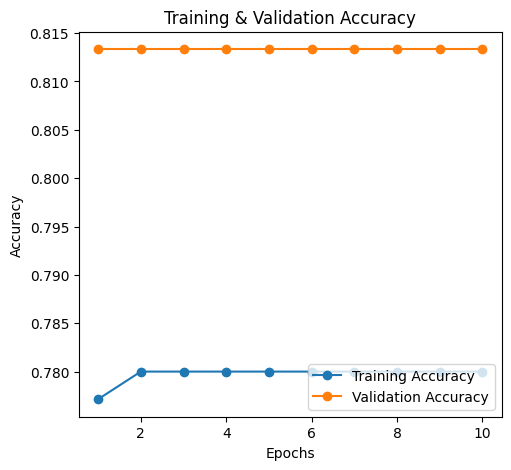

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, valAccuracy, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')

Text(0.5, 1.0, 'Training & Validation Loss')

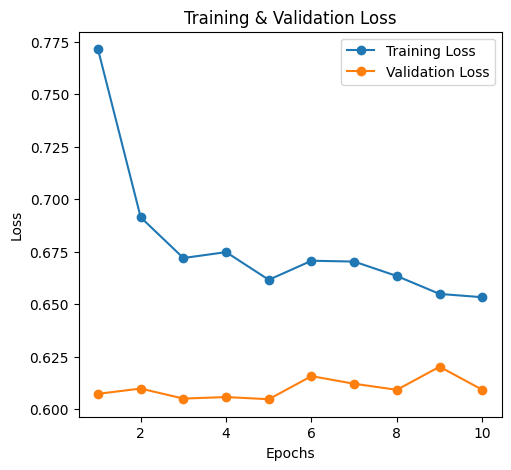

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, valLoss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')

##### overfitting

### OUTPUT VS PREDICTED OUTPUT


In [22]:
predictions = model.predict(padded_sequences)
corrected_classes = np.argmax(predictions, axis=1)
mapping = {0: 1, 1: 2, 2: 0}
predictedClasses = np.array([mapping[i] for i in corrected_classes])


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


In [23]:

print(predictions[:5])


[[0.15729956 0.79339945 0.04930101]
 [0.15729785 0.79340136 0.04930077]
 [0.1572974  0.79340184 0.04930071]
 [0.15729745 0.79340184 0.04930073]
 [0.07856291 0.86421597 0.05722098]]


In [24]:

print("Any NaNs in predictions?", np.isnan(predictions).any())
print("Any infinities in predictions?", np.isinf(predictions).any())


Any NaNs in predictions? False
Any infinities in predictions? False


In [25]:
comparisonData=pd.DataFrame({
    "Text":lmtpData["CombinedText"],
    "Actual Sentiment":lmtpData["Sentiment"].values,
    "Predicted Sentiment":predictedClasses
})


In [26]:
comparisonData = comparisonData.iloc[:1000]


In [27]:
comparisonData = comparisonData.copy()

comparisonData["Positive"] = predictions[:, 0] 
comparisonData["Neutral"] = predictions[:, 1]  
comparisonData["Negative"] = predictions[:, 2]



In [28]:
print(comparisonData.describe())
print(comparisonData.dtypes)


       Actual Sentiment  Predicted Sentiment     Positive      Neutral  \
count       1000.000000               1000.0  1000.000000  1000.000000   
mean           0.928000                  2.0     0.158112     0.784515   
std            0.452792                  0.0     0.038004     0.045085   
min            0.000000                  2.0     0.061720     0.445906   
25%            1.000000                  2.0     0.157297     0.793179   
50%            1.000000                  2.0     0.157298     0.793401   
75%            1.000000                  2.0     0.157350     0.793402   
max            2.000000                  2.0     0.433195     0.883952   

          Negative  
count  1000.000000  
mean      0.057373  
std       0.014961  
min       0.049301  
25%       0.049301  
50%       0.049302  
75%       0.058724  
max       0.158399  
Text                    object
Actual Sentiment         int64
Predicted Sentiment      int64
Positive               float32
Neutral             

In [29]:
comparisonData.head(10)

,Text,Actual Sentiment,Predicted Sentiment,Positive,Neutral,Negative
441316,"Good full flavored cup of dessert coffee This is definitely a dessert coffee. It has a very mild blend of beans and the buttercream flavor lends its flavor to a very mellow brew. Enjoyable and very palatable, but best enjoyed as a follow up to a meal or as a dessert accompaniment.",1,2,0.157300,0.793399,0.049301
185215,"Mouth Watering Delicious! I have always loved Swiss Colony for all of their Petits Fours and Bonbons. They are so delicious and mouth watering, you will absolutely love them! I know they are a little expensive, but well worth it. I would highly recommend Swiss Colony!",1,2,0.157298,0.793401,0.049301
197013,nature valley's Chewy Trail Mix bars are yummy! These bars are great! They are wholesome and excellent for an on the go snack!,1,2,0.157297,0.793402,0.049301
509580,"Best Tea Around Amazon offers this tea at an amazing price compared to our local grocery stores...even when our stores have it on sale. And with Free Shipping, you can't beat it.",1,2,0.157297,0.793402,0.049301
402934,"Both formulas are excellent for my dogs! I have a nearly 1 year old golden retriever/standard poodle mix, and a 6 year old german shepherd. The doodle gets the chicken and brown rice (just switched her a few weeks ago from Nutro Max) and the shepherd gets the healthy weight. I have tried several different foods for the doodle, and many of them caused problems like diarrhea and stinky, stinky farts. With this, while switching from the Nutro Max, she had none of those problems. In fact, I only took 5 days to switch her instead of 2 or so weeks, and she didn't have any digestive problems. Both dogs seem to like it and it is definitely cost effective... several dollars cheaper at my local Wegman's and there are always coupons in the paper. This is a very high quality food for the price, and I like that it's available at the grocery store as I live in a small town. I highly recommend this food and hope to feed it exclusively for as long as my doggies shall live!",1,2,0.078563,0.864216,0.057221
557089,Finally Found it! I used to be able to purchase this soup in my local supermarket. One day it was gone! I happened to be shopping on Amazon and thought I would see if they had it and they did!!It is the best soup mix at a good price!!,1,2,0.157298,0.793401,0.049301
470282,"Delicious! We won't use any other salt. This stuff is so tasty, healthy AND reasonably priced (esp compared with Pink salt which doesn't have near as many minerals) I can't imagine using anything else... except to melt ice of course ;)",1,2,0.157298,0.793402,0.049301
239282,"Very Good! This is really good! I mixed mine with half regular coffee (I don't want to go into withdrawals)!! I discovered that I can drink this without creamer, which is nice because I am allergic to dairy and powdered creamers are just chemicals. Almond milk wasn't that great either. This is smooth, and the vanilla taste is like a gourmet coffee shop.",1,2,0.157316,0.793381,0.049303
221903,"Delicious I'm a fan of Zhena's teas, and have acquired quite a collection of them. I must say that this is my favorite thus far! Delicious with some milk and honey!",1,2,0.157297,0.793402,0.049301
436610,"Give it a Chance I purchased Walden Farms Calorie Free Ranch Dressing when I decided change the way I eat. At first, I wasn't too sure about the dressing, as it tasted nothing like regular Ranch dressings at all. By the third time I used it though, I decided it was great. Once you give up the real stuff, this does grow on you. I now love this dressing and will eat it for the rest of my life!",1,2,0.157977,0.792604,0.049419


In [30]:
comparisonData.to_excel("PredictedSample1.xlsx", index=False)


## TRAINING USING NEW SAMPLE DATASET

In [31]:
droppedData=dataset.drop(lmtpData.index)
dataset2=droppedData.sample(1000,random_state=43)
dataset2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150210,150211,B0029JHHO2,A1G77Q620AHNUM,"olliesmom ""mimi l""",0,0,4,1336435200,Good flavor,Very good traditional artificial grape flavor. Kind of like grape bubble gum. They are not as hard as I expected but I think they are worth the money.
541134,541135,B000FMTJJQ,AYTK4QORQI9JV,"Elijah Rich ""Krissy and Elijah Rich""",0,0,3,1200614400,"okay, but not as good as the original","i guess i didn't look carefully enough at the description, but this was the ""light"" version and i had to use much more to equal the regular agave."
480332,480333,B000DZDJ0K,A3UASVI19W8VSF,M. Cullinan,0,0,5,1344211200,Pamela's pancake mix,"The best pancake mix ever made! We've been buying it for years, and don't use any other brands. It is also gluten free."
363022,363023,B0049WV8S8,A2FQFBYB8BIEDV,Gale DiBeneditto,15,16,5,1302134400,Best for cooking bacon,This bacon cooker is the best I have come across so far.<br />Even my husband approves and he only would eat bacon cooked on top of<br />the stove in a fry pan.<br />I am ordering another one.<br />It's easy to clean. I don't think one would be disappointed.
555887,555888,B001TLY7BM,A2FVN7DQI3D4PB,Sandy M.,0,0,4,1350604800,Weruva Paw Lickin' Chicken wet cat food,"I have two diabetic senior cats in my brood and I try to make sure I feel them all the best quality food I can fit into my budget. The cats do love this food and I feel good feeding it to them because it is high quality. The ingredients read like human-food, there are virtually no preservatives and it doesn't have that ""cat food"" smell. The cats always lick off all of the ""broth"" it's packed in before moving on to the shreds of chicken breast itself.<br /><br />My only caveat is the cost. Yes, I know you pay more for good quality cat food but I have read that even a lower quality wet food is better for your cats than a diet consisting of only dry food, even if it's the best dry food. I feed my cats wet food once daily and they have ""grazing priviledges"" with a bowl of high quality dry food (<a href=""http://www.amazon.com/gp/product/B002C1WE5O"">Solid Gold Indigo Moon Holistic Cat Food</a>) that I typically have to fill once a day. I may buy this once in a while as a treat but they seem to enjoy the less expensive leading brand just as much."


In [32]:
lmtpData2=dataset2[['Score','Summary','Text']]
lmtpData2.head()

,Score,Summary,Text
150210,4,Good flavor,Very good traditional artificial grape flavor. Kind of like grape bubble gum. They are not as hard as I expected but I think they are worth the money.
541134,3,"okay, but not as good as the original","i guess i didn't look carefully enough at the description, but this was the ""light"" version and i had to use much more to equal the regular agave."
480332,5,Pamela's pancake mix,"The best pancake mix ever made! We've been buying it for years, and don't use any other brands. It is also gluten free."
363022,5,Best for cooking bacon,This bacon cooker is the best I have come across so far.<br />Even my husband approves and he only would eat bacon cooked on top of<br />the stove in a fry pan.<br />I am ordering another one.<br />It's easy to clean. I don't think one would be disappointed.
555887,4,Weruva Paw Lickin' Chicken wet cat food,"I have two diabetic senior cats in my brood and I try to make sure I feel them all the best quality food I can fit into my budget. The cats do love this food and I feel good feeding it to them because it is high quality. The ingredients read like human-food, there are virtually no preservatives and it doesn't have that ""cat food"" smell. The cats always lick off all of the ""broth"" it's packed in before moving on to the shreds of chicken breast itself.<br /><br />My only caveat is the cost. Yes, I know you pay more for good quality cat food but I have read that even a lower quality wet food is better for your cats than a diet consisting of only dry food, even if it's the best dry food. I feed my cats wet food once daily and they have ""grazing priviledges"" with a bowl of high quality dry food (<a href=""http://www.amazon.com/gp/product/B002C1WE5O"">Solid Gold Indigo Moon Holistic Cat Food</a>) that I typically have to fill once a day. I may buy this once in a while as a treat but they seem to enjoy the less expensive leading brand just as much."


In [33]:
lmtpData2 = lmtpData2.copy()
lmtpData2['Summary'] = lmtpData2['Summary'].fillna("")
lmtpData2['CombinedText'] = lmtpData2['Summary'] + " " + lmtpData2['Text']


In [34]:
lmtpData2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 150210 to 28988
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Score         1000 non-null   int64 
 1   Summary       1000 non-null   object
 2   Text          1000 non-null   object
 3   CombinedText  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.1+ KB


In [35]:

lmtpData2['Sentiment']=lmtpData2['Score'].apply(lblScore)
lmtpData2.head(5)

,Score,Summary,Text,CombinedText,Sentiment
150210,4,Good flavor,Very good traditional artificial grape flavor. Kind of like grape bubble gum. They are not as hard as I expected but I think they are worth the money.,Good flavor Very good traditional artificial grape flavor. Kind of like grape bubble gum. They are not as hard as I expected but I think they are worth the money.,1
541134,3,"okay, but not as good as the original","i guess i didn't look carefully enough at the description, but this was the ""light"" version and i had to use much more to equal the regular agave.","okay, but not as good as the original i guess i didn't look carefully enough at the description, but this was the ""light"" version and i had to use much more to equal the regular agave.",2
480332,5,Pamela's pancake mix,"The best pancake mix ever made! We've been buying it for years, and don't use any other brands. It is also gluten free.","Pamela's pancake mix The best pancake mix ever made! We've been buying it for years, and don't use any other brands. It is also gluten free.",1
363022,5,Best for cooking bacon,This bacon cooker is the best I have come across so far.<br />Even my husband approves and he only would eat bacon cooked on top of<br />the stove in a fry pan.<br />I am ordering another one.<br />It's easy to clean. I don't think one would be disappointed.,Best for cooking bacon This bacon cooker is the best I have come across so far.<br />Even my husband approves and he only would eat bacon cooked on top of<br />the stove in a fry pan.<br />I am ordering another one.<br />It's easy to clean. I don't think one would be disappointed.,1
555887,4,Weruva Paw Lickin' Chicken wet cat food,"I have two diabetic senior cats in my brood and I try to make sure I feel them all the best quality food I can fit into my budget. The cats do love this food and I feel good feeding it to them because it is high quality. The ingredients read like human-food, there are virtually no preservatives and it doesn't have that ""cat food"" smell. The cats always lick off all of the ""broth"" it's packed in before moving on to the shreds of chicken breast itself.<br /><br />My only caveat is the cost. Yes, I know you pay more for good quality cat food but I have read that even a lower quality wet food is better for your cats than a diet consisting of only dry food, even if it's the best dry food. I feed my cats wet food once daily and they have ""grazing priviledges"" with a bowl of high quality dry food (<a href=""http://www.amazon.com/gp/product/B002C1WE5O"">Solid Gold Indigo Moon Holistic Cat Food</a>) that I typically have to fill once a day. I may buy this once in a while as a treat but they seem to enjoy the less expensive leading brand just as much.","Weruva Paw Lickin' Chicken wet cat food I have two diabetic senior cats in my brood and I try to make sure I feel them all the best quality food I can fit into my budget. The cats do love this food and I feel good feeding it to them because it is high quality. The ingredients read like human-food, there are virtually no preservatives and it doesn't have that ""cat food"" smell. The cats always lick off all of the ""broth"" it's packed in before moving on to the shreds of chicken breast itself.<br /><br />My only caveat is the cost. Yes, I know you pay more for good quality cat food but I have read that even a lower quality wet food is better for your cats than a diet consisting of only dry food, even if it's the best dry food. I feed my cats wet food once daily and they have ""grazing priviledges"" with a bowl of high quality dry food (<a href=""http://www.amazon.com/gp/product/B002C1WE5O"">Solid Gold Indigo Moon Holistic Cat Food</a>) that I typically have to fill once a day. I may buy this once in a while as a treat but they seem to enjoy the less expensive leading brand just as much.",1


In [36]:
tokenizer.fit_on_texts(lmtpData2['CombinedText'])
sequences=tokenizer.texts_to_sequences(lmtpData2['CombinedText'])

maxLen=100
paddedData=pad_sequences(sequences,maxlen=maxLen,padding='post')
embedding_dim=100
vocabSize=len(tokenizer.word_index) + 1

embeddingMatrix2=np.zeros((vocabSize,embedding_dim))

for word,i in tokenizer.word_index.items():
    embeddingVector2=gloveEmbeddings.get(word)
    if embeddingVector2 is not None:
        embeddingMatrix2[i]=embeddingVector2

### BALANCING THE CLASSES

In [37]:
from imblearn.over_sampling import SMOTE


y2 = lmtpData2['Sentiment'].values


smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(paddedData, y2)


In [38]:
maxLen=100
model = Sequential([
    Input(shape=(maxLen,)),
    Embedding(input_dim=vocabSize,  
              output_dim=embedding_dim, 
              weights=embeddingMatrix2, 
             
              trainable=False), 
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.6),
    Dense(3, activation='softmax') 
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │       1,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168,851 (4.46 MB)

 Trainable params: 166,851 (651.76 KB)

 Non-trainable params: 1,002,000 (3.82 MB)

In [39]:
model.fit(X_resampled, Y_resampled, epochs=6, batch_size=32, validation_split=0.3)

Epoch 1/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.4869 - loss: 0.9433 - val_accuracy: 0.0000e+00 - val_loss: 2.7960
Epoch 2/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.5202 - loss: 0.8854 - val_accuracy: 0.0000e+00 - val_loss: 2.9947
Epoch 3/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.5076 - loss: 0.8564 - val_accuracy: 0.0000e+00 - val_loss: 3.4829
Epoch 4/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.5249 - loss: 0.8695 - val_accuracy: 0.0000e+00 - val_loss: 2.9748
Epoch 5/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.5460 - loss: 0.8634 - val_accuracy: 0.0000e+00 - val_loss: 3.3342
Epoch 6/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.5693 - loss: 0.8349 - val_accuracy: 0.0000e+00 - val_loss: 3.1565


In [40]:
model.fit(X_resampled, Y_resampled, epochs=15, batch_size=32, validation_split=0.4)

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.6107 - loss: 0.8258 - val_accuracy: 0.0780 - val_loss: 2.3970
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.6373 - loss: 0.7758 - val_accuracy: 0.0936 - val_loss: 2.6163
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.6383 - loss: 0.7973 - val_accuracy: 0.2152 - val_loss: 2.8819
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.7115 - loss: 0.6917 - val_accuracy: 0.2432 - val_loss: 2.6633
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.6574 - loss: 0.7519 - val_accuracy: 0.1830 - val_loss: 2.6694
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.6905 - loss: 0.7065 - val_accuracy: 0.1341 - val_loss: 2.5937
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.6568 - loss: 0.7072 - val_accuracy: 0.2349 - val_loss: 2.7319
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - accuracy: 0.7245 - loss: 0.6957 - val_accuracy: 0.

In [41]:
model.fit(X_resampled, Y_resampled, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.7546 - loss: 0.7387 - val_accuracy: 0.0021 - val_loss: 1.5922
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.7784 - loss: 0.5815 - val_accuracy: 0.0042 - val_loss: 1.5941
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8114 - loss: 0.5429 - val_accuracy: 0.0166 - val_loss: 1.2370
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8119 - loss: 0.4839 - val_accuracy: 0.0146 - val_loss: 1.3144
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.8039 - loss: 0.5427 - val_accuracy: 0.0083 - val_loss: 1.4342
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.8257 - loss: 0.4640 - val_accuracy: 0.0146 - val_loss: 1.4264
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.8200 - loss: 0.4646 - val_accuracy: 0.0395 - val_loss: 1.2975
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.7933 - loss: 0.5367 - val_accuracy: 0.

### WITHOUT SMOTE

In [42]:
model.fit(paddedData,y2, epochs=15, batch_size=32, validation_split=0.3)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9547 - loss: 0.1902 - val_accuracy: 0.9367 - val_loss: 0.1813
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9277 - loss: 0.2612 - val_accuracy: 0.9567 - val_loss: 0.1545
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9607 - loss: 0.1531 - val_accuracy: 0.9567 - val_loss: 0.1812
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.9541 - loss: 0.1613 - val_accuracy: 0.9633 - val_loss: 0.1475
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9480 - loss: 0.1831 - val_accuracy: 0.9667 - val_loss: 0.1289
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9307 - loss: 0.2122 - val_accuracy: 0.9300 - val_loss: 0.2374
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.9545 - loss: 0.1881 - val_accuracy: 0.9500 - val_loss: 0.1688
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9310 - loss: 0.2467 - val_accuracy: 0.

#### PREDICTING DATA


In [43]:
predictedData=model.predict(paddedData)

corrected_classes2 = np.argmax(predictedData, axis=1)
mapping = {0: 1, 1: 2, 2: 0}
predClasses= np.array([mapping[i] for i in corrected_classes2])

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


In [44]:
comparisonData2=pd.DataFrame({
    "Text":lmtpData["CombinedText"],
    "Actual Sentiment":lmtpData["Sentiment"].values,
    "Predicted Sentiment":predClasses
})


comparisonData2["Positive"] = predictedData[:, 0] 
comparisonData2["Neutral"] = predictedData[:, 1]  
comparisonData2["Negative"] = predictedData[:, 2]

In [45]:
comparisonData2.tail(10)

,Text,Actual Sentiment,Predicted Sentiment,Positive,Neutral,Negative
174217,"Excellent Quality I regularly order this soy milk product and use it with granola cereal. It is great by itself as well. Be sure to serve chilled. It has a strong vanilla flavor, which I like. I keep thinking that I'm going to get tired of it, but it still tastes great each and every carton.",1,2,0.148347,0.704749,0.146905
531696,My Favorite :-) Great quality service and product every time !! Everyone should try Grove Square French Vanilla Cappuccino cups. The option for the 3 pack 18 count best fits my lifestyle.,1,2,0.003725,0.994473,0.001802
311327,"Yum! and a fraction of the price of others on Amaz. This stuff is fresh and smells great!<br />Ingredients as listed:<br />""CUMIN, CLOVES, GINGER, BLK. PEPPER, CORIANDER, CINNAMON, SALT, CARDAMON""<br />I just threw it into some curried lentils, with great results. You get a lot and quality seems to be very good, so great value here. I'm really looking forward to all the things I'm going to make with this jar of it.",1,2,0.012548,0.962343,0.025109
274784,SEEMS TO BE A WATERED DOWN PRODUCT Sadaf Vinegar - Red Wine 32-oz seems to be a watered down version of the most common brand I buy from my local grocery store. Particularly when I use it in making vinagrettes I notice just how weak it is compared to others I have purchased. I would not recommend this unless you like a watered-down taste.,0,2,0.012503,0.962428,0.025069
471492,"Box now changed and Tea STINKS! I got a case of this and the box now says ""white tea for smooth taste"" and the ingredients are Green Tea, White Tea and Raspberry flavor with other natural flavors. The tea leaves an almost chalky, blah taste in your mouth. I very much enjoyed the old formula with the picture of the angel on the package and am sad to see this go and HIGHLY disapointed with Amazon for not warning me I was not getting the same product. The ingredients list and picture on this webpage are wrong!!! DON'T BUY IT!",0,2,0.000085,0.999377,0.000538
371200,"My Mother loved it! My Mother called and just recieved this assortment. She LOVES it. She said it is a large box, filled with full sized candy and she remembered many of them.<br />She was very suprised and said it was the best gift she has recived so far. The product was true to the description and was well worth the money.",1,2,0.012503,0.962429,0.025068
279625,Tazo Chai Tea Excellent product and great taste. It even has a nice spiced bite to it!,1,2,0.012283,0.963178,0.024539
421670,"LOVE IT!! LOVE IT!!! L O V E IT!!!!!!!!!!!!!!!!!!!!!!! I purchased this for massage, but out of curiosity I tasted it, I might buy another just for food use! The smell is WONDERFUL not strong or over powering. Sinks in to skin quickly leaves no grease or oil on your skin, just amazing softness.<br />BUY IT!!",1,2,0.012823,0.962038,0.025140
534980,"excellent bags for freezing nothing bad to say about these bags. great quality and value, no leaks, holds a lot more than what's marked. i stack them flat in a tupperware in the freezer, then transfer to a larger freezer zip-loc bag for maximum use of my freezer space. also, our milk bank doesn't provide bags to bm donors, so i'm using these to store/freeze for donations.",1,2,0.012474,0.962527,0.024999
475536,Crystal Light This by far the best Crystal Light product on the market I just wish you would keep making it but an e-mail I just received stated they are going to stop making it this a bummer,1,2,0.018120,0.959916,0.021964


In [46]:
comparisonData2.to_excel('PredictedSample2.xlsx')

#### USING A SPECIFIC REVIEW

In [47]:

new_review = "I love this product, it's amazing!"


new_review_tokens = tokenizer.texts_to_sequences([new_review])
new_review_padded = pad_sequences(new_review_tokens, maxlen=maxLen)

predictions = model.predict(new_review_padded)


predicted_class = np.argmax(predictions, axis=1)

print("Predicted Class: ", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Class:  [0]


## PREDICTING SPECIFIC REVIEWS

In [48]:
def predictReviewSentiment(review,tokenizer,model,mapping,maxLength=100):
    revSequence=tokenizer.texts_to_sequences([review])
    paddedReviews=pad_sequences(revSequence,maxlen=maxLength,padding='post')
    revPredictions=model.predict(paddedReviews)
    negative_prob, neutral_prob, positive_prob = revPredictions[0]
    predicted_class = np.argmax(revPredictions, axis=1)[0]  
    sentiment = mapping[predicted_class]
    return {
        "Review": review,
        "Probabilities": {
            "Negative": negative_prob,
            "Neutral": neutral_prob,
            "Positive": positive_prob
        },
        "Predicted Sentiment": sentiment
    }
mapping = {0: "Negative", 1: "Neutral", 2: "Positive"} 
text="I had high hopes for this product after reading multiple positive reviews, but unfortunately, my experience was quite mixed. The packaging was impressive, giving it a premium feel, but upon opening, I noticed an overpowering artificial scent that was quite off-putting. I decided to give it a fair chance, so I followed the instructions to the letter, hoping the actual performance would overshadow my initial doubts. The first few uses were promising—it seemed to deliver on its claims, and I started thinking I had found my new go-to. However, after consistent use over a couple of weeks, the drawbacks became painfully apparent. The quality didn’t hold up, and instead of improving my experience, I felt it became more of a hassle. The texture was inconsistent, and I found myself frustrated more often than satisfied. Another issue I encountered was the durability—what was advertised as long-lasting started showing signs of wear way too soon. While I can appreciate the effort put into making this product appealing, the reality just didn’t match the hype. I wouldn't go as far as to say it's completely useless—it has its moments—but I certainly wouldn’t repurchase at this price point. If you're someone who values longevity and consistent performance, you might want to look elsewhere. For me, it's a disappointing experience that didn’t live up to the expectations."
result = predictReviewSentiment(text, tokenizer, model, mapping)
print (result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
{'Review': "I had high hopes for this product after reading multiple positive reviews, but unfortunately, my experience was quite mixed. The packaging was impressive, giving it a premium feel, but upon opening, I noticed an overpowering artificial scent that was quite off-putting. I decided to give it a fair chance, so I followed the instructions to the letter, hoping the actual performance would overshadow my initial doubts. The first few uses were promising—it seemed to deliver on its claims, and I started thinking I had found my new go-to. However, after consistent use over a couple of weeks, the drawbacks became painfully apparent. The quality didn’t hold up, and instead of improving my experience, I felt it became more of a hassle. The texture was inconsistent, and I found myself frustrated more often than satisfied. Another issue I encountered was the durability—what was advertised as long-lasting started showing signs of wear way too soon. W

In [49]:
review3 = """I purchased this product a few weeks ago, and honestly, I have mixed feelings about it. 
It does what it’s supposed to do, but there’s nothing particularly special about it. 
The design is pretty standard, and while it functions well most of the time, 
I wouldn’t say it exceeds expectations. It’s neither the best nor the worst I’ve used—it just gets the job done. 

The build quality seems decent, though I do wonder about its long-term durability. 
It’s not flimsy, but it doesn’t feel premium either. The setup process was straightforward, 
though I did have to check the instructions a couple of times to clarify a few things. 

Performance-wise, I’d say it’s reliable, but there are occasional inconsistencies. 
Sometimes it works perfectly, other times it takes a bit of effort to get it going. 
Nothing major, but enough to notice. 

Would I buy it again? Maybe, if I didn’t find a better alternative. 
It’s not a bad purchase, but it’s also not something I would enthusiastically recommend. 
If you need something that works and aren’t too picky about minor inconveniences, this should be fine."""

result3 = predictReviewSentiment(review3, tokenizer, model, mapping)
print(result3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
{'Review': 'I purchased this product a few weeks ago, and honestly, I have mixed feelings about it. \nIt does what it’s supposed to do, but there’s nothing particularly special about it. \nThe design is pretty standard, and while it functions well most of the time, \nI wouldn’t say it exceeds expectations. It’s neither the best nor the worst I’ve used—it just gets the job done. \n\nThe build quality seems decent, though I do wonder about its long-term durability. \nIt’s not flimsy, but it doesn’t feel premium either. The setup process was straightforward, \nthough I did have to check the instructions a couple of times to clarify a few things. \n\nPerformance-wise, I’d say it’s reliable, but there are occasional inconsistencies. \nSometimes it works perfectly, other times it takes a bit of effort to get it going. \nNothing major, but enough to notice. \n\nWould I buy it again? Maybe, if I didn’t find a better alternative. \nIt’s not a bad purchase, 

In [50]:
review4 = """This is by far one of the worst purchases I have ever made. From the moment I opened the box, I knew I had made a mistake. The product feels cheap, poorly made, and looks nothing like what was advertised.

It barely functions as intended—half the time, it doesn't even turn on, and when it does, it either malfunctions or stops working within minutes. The materials used are flimsy, and I honestly wouldn’t be surprised if it breaks completely within a few weeks.

The worst part is the customer service. I tried to reach out for support, but all I got were generic, unhelpful responses that didn’t even address my issue. They refused to offer a refund, and after several emails, they just stopped responding altogether.

I wouldn’t recommend this to anyone. Save your money and buy something from a reputable brand instead. If I could rate this zero stars, I would."""

result4 = predictReviewSentiment(review4, tokenizer, model, mapping)
print(result4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
{'Review': "This is by far one of the worst purchases I have ever made. From the moment I opened the box, I knew I had made a mistake. The product feels cheap, poorly made, and looks nothing like what was advertised.\n\nIt barely functions as intended—half the time, it doesn't even turn on, and when it does, it either malfunctions or stops working within minutes. The materials used are flimsy, and I honestly wouldn’t be surprised if it breaks completely within a few weeks.\n\nThe worst part is the customer service. I tried to reach out for support, but all I got were generic, unhelpful responses that didn’t even address my issue. They refused to offer a refund, and after several emails, they just stopped responding altogether.\n\nI wouldn’t recommend this to anyone. Save your money and buy something from a reputable brand instead. If I could rate this zero stars, I would.", 'Probabilities': {'Negative': 0.05716219, 'Neutral': 0.88392127, 'Positive'